In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#load customer dataset
cust_df=pd.read_csv(r'C:\Users\user\Downloads\Customer_data - customer_data.csv')
cust_df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [8]:
#understand data
cust_df.shape
cust_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
cust_df.info
cust_df.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
customerID_0003-MKNFE                    0
                                        ..
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn_Yes                                0
Length: 7073, dtype: int64

In [12]:
#find patterns b/w churn & other feactures
cust_df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

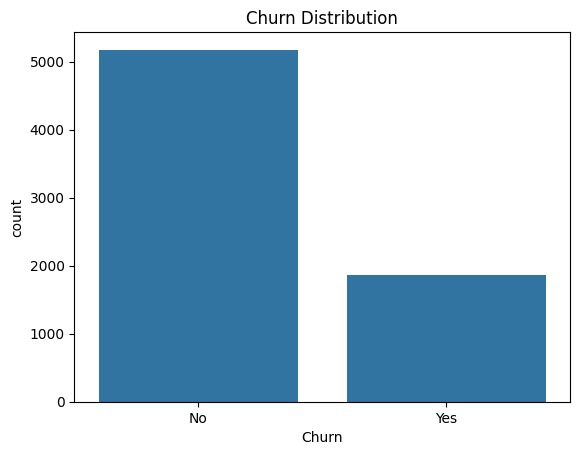

In [13]:
sns.countplot(x='Churn', data=cust_df)
plt.title("Churn Distribution")
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

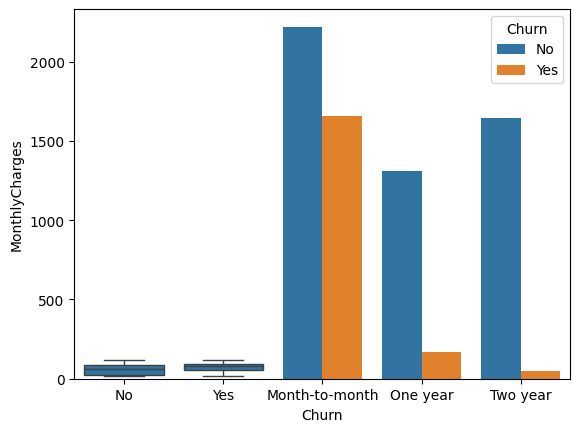

In [14]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=cust_df)
sns.countplot(x='Contract', hue='Churn', data=cust_df)

In [15]:
#data exploration and preprocessing
#handling missing values
cust_df['TotalCharges'] = pd.to_numeric(cust_df['TotalCharges'], errors='coerce')
cust_df['TotalCharges'].fillna(cust_df['TotalCharges'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9704\1417897031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_df['TotalCharges'].fillna(cust_df['TotalCharges'].median(), inplace=True)


In [16]:
#covert categorical to numerical
cust_df = pd.get_dummies(cust_df, drop_first=True)

In [21]:
cust_df.isnull().sum().sum()

np.int64(0)

In [23]:
#drop column
X = cust_df.drop('Churn_Yes', axis=1)  # Target: Churn_Yes (1 if churned)
y = cust_df['Churn_Yes']

In [24]:
#train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# accuracy,precision, recall, F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7920511000709723
Precision: 0.622356495468278
Recall: 0.5508021390374331
F1 Score: 0.5843971631205673
Confusion Matrix:
 [[910 125]
 [168 206]]
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.88      0.86      1035
        True       0.62      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [31]:
#machine learning model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.8026969481902059


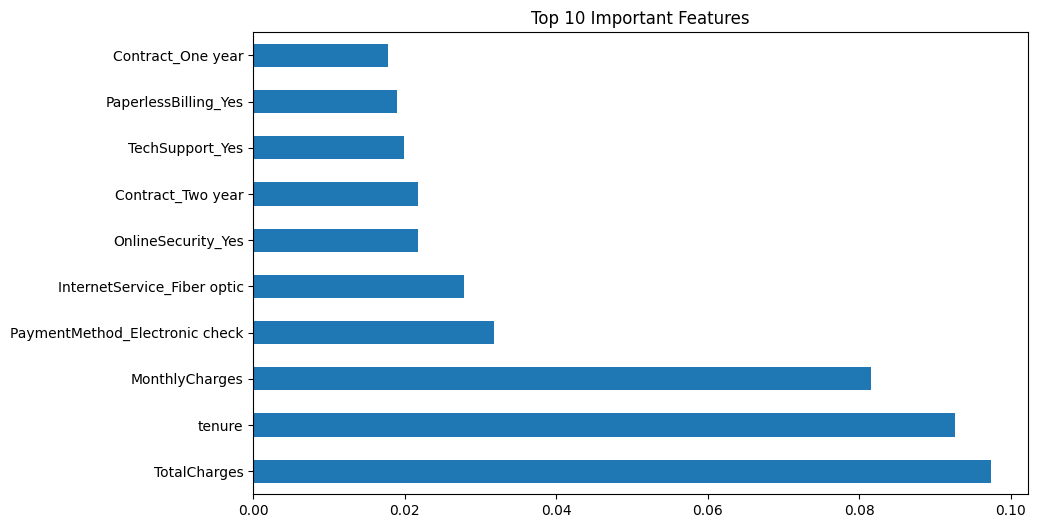

In [33]:
importances = rf_model.feature_importances_
features = X.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_importances[:10].plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()